In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import datasets, metrics, linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

os.chdir('D:\\Documents\\DAAN862')

df = pd.read_csv('breastcancer.csv')
display(df)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [2]:
# Question 1 - Perform exploratory data analysis
display(df.describe())
display(df.corr())

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


Text(0.5, 0, 'Predicted Label')

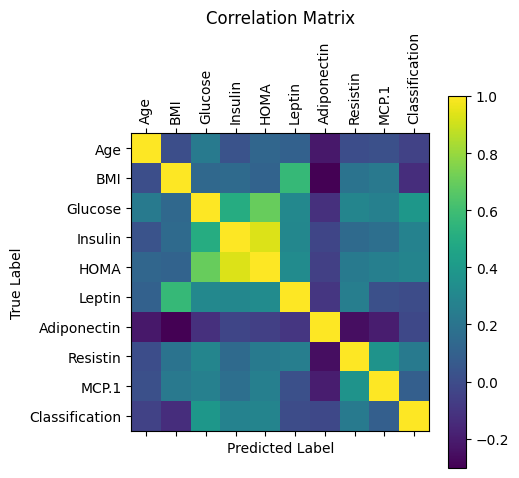

In [3]:
# Question 1 Cont
plt.matshow(df.corr())
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(10), list(df.columns), rotation=90)
plt.yticks(range(10), list(df.columns))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [4]:
# Question 2 - Use 30% of data to build a logistic rgression model
X = df.iloc[:, 0:9]
y = df.Classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
# Question 2 Cont - Predict the Labels Variable
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)
print('Trained Accuracy:')
display(metrics.accuracy_score(y_train, lr_train_pred))
print('Test Accuracy:')
display(metrics.accuracy_score(y_test, lr_test_pred))

Trained Accuracy:


0.7901234567901234

Test Accuracy:


0.7428571428571429

array([[14,  3],
       [ 6, 12]], dtype=int64)

<Figure size 640x480 with 0 Axes>

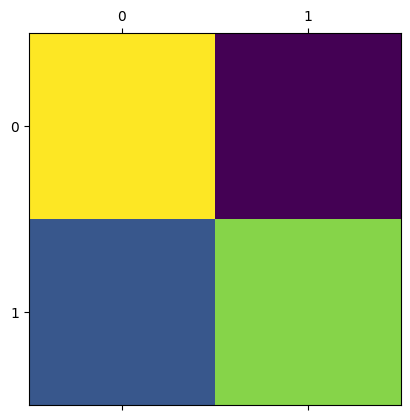

In [6]:
# Question 2 Cont 
# We can use a confusion matrix to see how each value compares
# such that 0 - 0 and 1 - 1 are all matching values and
# 1 - 0 and 0 - 1 are mismatched
test_cm = metrics.confusion_matrix(y_test, lr_test_pred)
display(test_cm)
plt.figure()
plt.matshow(test_cm)

In [7]:
# Question 3 - Build the Naive Bayes model to predict Labels
NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB(priors=None)

NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

print('Trained Accuracy:')
display(metrics.accuracy_score(y_train, NB_train_pred))
print('Test Accuracy:')
display(metrics.accuracy_score(y_test, NB_test_pred))

Trained Accuracy:


0.6049382716049383

Test Accuracy:


0.6571428571428571

In [20]:
# Question 4 - Build the Decision Tree model to predict Labels
DT = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)
DT.fit(X_train, y_train)

DT_pred = DT.predict(X_test)
print('Test Accuracy:')
display(metrics.accuracy_score(DT_pred, y_test))
print(metrics.classification_report(y_test, DT_pred))

Test Accuracy:


0.8

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.79      0.83      0.81        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



In [19]:
# Question 5 - Build the Neural Network to predict Labels
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NN = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, 
                  hidden_layer_sizes = (10,4), random_state = 1)

NN.fit(X_train_scaled, y_train)

NN_pred = NN.predict(X_test_scaled)
print('Accuracy: ')
display(metrics.accuracy_score(NN_pred, y_test))
print(metrics.classification_report(y_test, NN_pred))

Accuracy: 


0.7428571428571429

              precision    recall  f1-score   support

           1       0.72      0.76      0.74        17
           2       0.76      0.72      0.74        18

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



In [22]:
# Question 6 - Which Model is Best?

# According to the accuracy results displayed per each model, the Decision tree model 
# was the most accurate out of the models used with an accuracy of 80% for the test data.
# The logistics regression model and neural network were both second best with a tested accuracy
# of 74.29%.
# We can infer that the most accurate at predicting Label's value in this scenario is the best model to use.


array([0.11629181, 0.15052565, 0.35939932, 0.06073649, 0.        ,
       0.06927582, 0.13830139, 0.04648804, 0.05898148])

array([-0.03418905, -0.102659  ,  0.11745601,  0.16455198, -0.44013788,
       -0.00796796, -0.03241404,  0.02332534,  0.00090969])

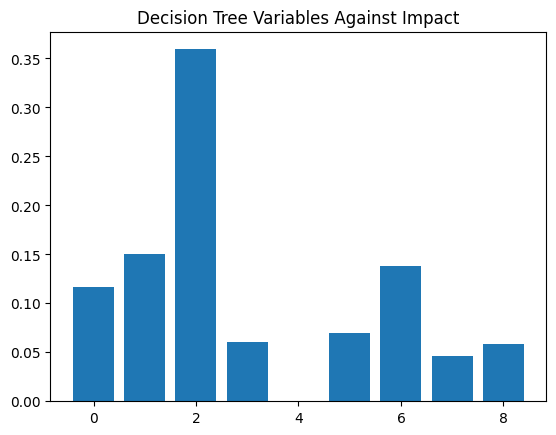

In [41]:
# Question 6 Cont - Which variable is most important?
# Lets use both the LR and the DT models to determine, where
# more confidence is given to the DT due to the higher accuracy

# We can use coef_ for LR and feature_importances_ for DT to get an array of weights
# that each variable has on the model
importance_lr = lr.coef_[0]
importance_dt = DT.feature_importances_

display(importance_dt)
display(importance_lr)

# Plot the DT Variables as Box plot
plt.bar([x for x in range(len(importance_dt))], importance_dt)
plt.title('Decision Tree Variables Against Impact')
plt.show()

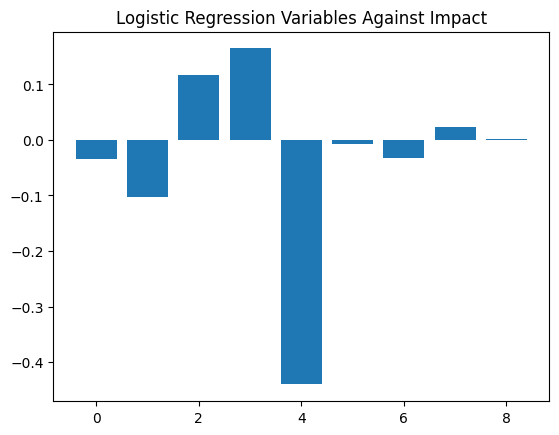

In [43]:
# Question 6 Cont - Plot the LR variables
plt.bar([x for x in range(len(importance_lr))], importance_lr)
plt.title('Logistic Regression Variables Against Impact')
plt.show()

# As shown, the DT model indicates that the 3rd variable, Glucose, has the most
# impact on whether the patient will have breast cancer or not. Alternatively,
# the LR model shows that HOMA levels have the highest correlation - which shows that
# despite each model had relatively high accuracy in predicting outcome,
# there are different weights to each variable. For this question, we will
# assume that Glucose is most important due to the fact that the DT model has higher
# accuracy.